# Некоторые технические моменты для проведения расчетов

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.3 от 17.10.2021

Хабибуллин Ринат 2021 г.

---

# Содержание

* [Сравнение скорости расчетов mpmath и scipy.special на примере Ei](#comparison-ei)
* [Сравнение скорости расчета численного обратного преобразования Лапласа](#compare-nilt) 
* [Проверка расчета численного обратного преобразования Лапласа для некоторых случаев](#laplace-invertion-check)


In [1]:
# для того, чтобы скрипты гладко работати на https://colab.research.google.com/ пропишем
# установку библиотеки anaflow которую будем использовать для обратного преобразования Лапласа
!pip install anaflow

In [2]:
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np
# matplotlib используем для построения графиков
import matplotlib.pyplot as plt

# mpmath используем для расчета спец фукнций и математических операций
from mpmath import *
mp.dps = 5;          # здесь задаем желаемую точность расчетов mpmath (количество знаков после запятой)
mp.pretty = True      # здесь задаем вывод функций mpmath в виде чисел а не объетов

# scipy.special используем как альтернативный вариант расчета специальных функций
import scipy.special as sc

# для расчета численного обратного преобразования Лапласа с использованием алгоритма Стефеста
from anaflow import get_lap_inv

# Сравнение скорости расчетов mpmath и scipy.special на примере Ei <a class="anchor" id="comparison-ei"></a>

Для рациоанального использования различных библиотек полезно понимать различия в их реализации. Один из факторов - скорость проведения расчетов. Скорость вычислений можно оценить с использованием специальной команды `%timeit`, которая запускает соответствующую операцию несколько раз и выводит статистику расчетов. Абсолютный цифры достаточно сильно будут зависеть от мощности компьютера на котором проводятся расчеты, но сравнение времен на расчет разных реализаций будет достаточно показательным. 

Если кому то нужны дополнительный баллы, то хорошо бы было сделать наглядных графический вывод результатов расчета (чтобы показывались и средние значения времен и отклонения) 

In [3]:
a=[1,2]
print(a*2)

[1, 2, 1, 2]


Количество элементов в массиве для расчета 200
0. Вычисляем с использованием scipy.special.expi с использованием векторного расчета много раз с измерением времени на вычисления 
22.2 µs ± 45.3 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1. Вычисляем с использованием scipy.special.expi много раз с измерением времени на вычисления 
213 µs ± 570 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2. Вычисляем с использованием mpmath.ei много раз (точность 5) с измерением времени на вычисления 
3.17 ms ± 6.79 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3. Вычисляем с использованием mpmath.ei много раз (точность 10) с измерением времени на вычисления 
3.39 ms ± 23.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4. Вычисляем с использованием mpmath.ei много раз (точность 15) с измерением времени на вычисления 
3.71 ms ± 7.33 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


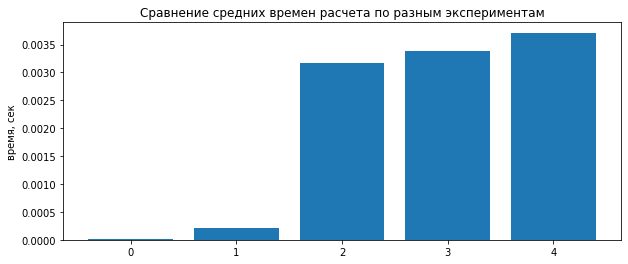

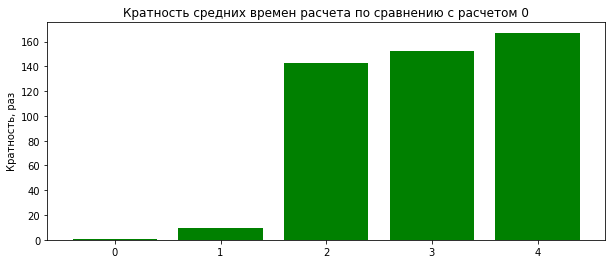

In [4]:
# рассчитаем набор значений Ei
x = np.arange(-1,1, 0.01)
print("Количество элементов в массиве для расчета " + str(len(x)))

t_list = []
index_list =[]

# нулевой вариант расчет
print("0. Вычисляем с использованием scipy.special.expi с использованием векторного расчета " +
      "много раз с измерением времени на вычисления ")
t_ei_0 = %timeit -o ei_0 = sc.expi(x) 
ei_0 = sc.expi(x)
index_list.append('0')
t_list.append(t_ei_0.average)

# первый вариант расчет
print("1. Вычисляем с использованием scipy.special.expi много раз с измерением времени на вычисления ")
t_ei_1 = %timeit -o ei_1 = np.array([sc.expi(xi) for xi in x])
ei_1 = np.array([sc.expi(xi) for xi in x])
index_list.append('1')
t_list.append(t_ei_1.average)

# второй вариант расчета
mp.dps = 5;  
print("2. Вычисляем с использованием mpmath.ei много раз (точность 5) с измерением времени на вычисления ")
t_ei_2 = %timeit -o ei_2 = np.array([ei(xi) for xi in x])
ei_2 = np.array([ei(xi) for xi in x])
index_list.append('2')
t_list.append(t_ei_2.average)

# третий вариант расчета
mp.dps = 10;  
print("3. Вычисляем с использованием mpmath.ei много раз (точность 10) с измерением времени на вычисления ")
t_ei_3 = %timeit -o ei_3 = np.array([ei(xi) for xi in x])
ei_3 = np.array([ei(xi) for xi in x])
index_list.append('3')
t_list.append(t_ei_3.average)

# четверный вариант расчета
mp.dps = 15;  
print("4. Вычисляем с использованием mpmath.ei много раз (точность 15) с измерением времени на вычисления ")
t_ei_4 = %timeit -o ei_4 = np.array([ei(xi) for xi in x])
ei_4 = np.array([ei(xi) for xi in x])
index_list.append('4')
t_list.append(t_ei_4.average)


plt.rcParams["figure.figsize"] = (10,4)

plt.bar(index_list, t_list)
plt.title("Сравнение средних времен расчета по разным экспериментам")
plt.ylabel('время, сек')
plt.show()

t_list = np.array(t_list)
plt.bar(index_list, t_list/t_list[0], color='green')
plt.title("Кратность средних времен расчета по сравнению с расчетом 0")
plt.ylabel('Кратность, раз')
plt.show()



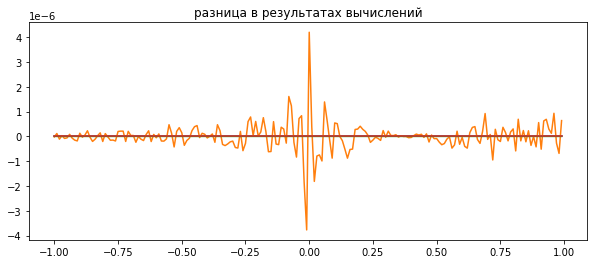

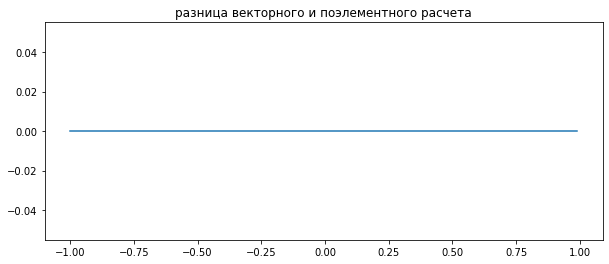

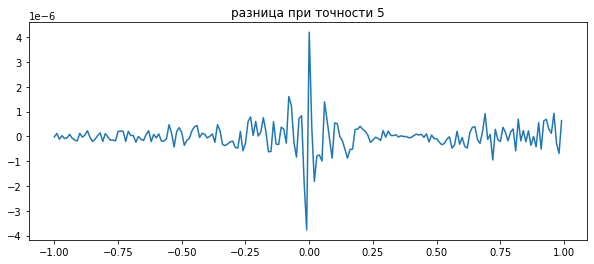

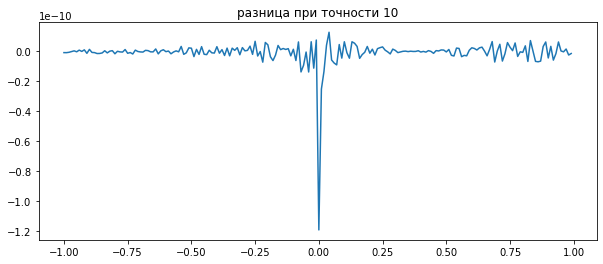

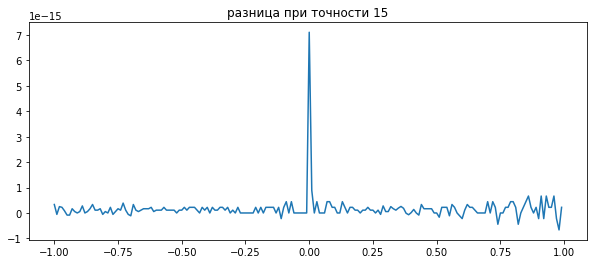

In [5]:
# Посмотрим на различия в результатах расчетов
de_0 = ei_0-ei_1
de_1 = ei_2-ei_1
de_2 = ei_3-ei_1
de_3 = ei_4-ei_1

plt.plot(x, de_0)
plt.plot(x, de_1)
plt.plot(x, de_2)
plt.plot(x, de_3)
plt.title("разница в результатах вычислений")
plt.show()

plt.plot(x, de_0)
plt.title("разница векторного и поэлементного расчета")
plt.show()

plt.plot(x, de_1)
plt.title("разница при точности 5")
plt.show()

plt.plot(x, de_2)
plt.title("разница при точности 10")
plt.show()

plt.plot(x, de_3)
plt.title("разница при точности 15")
plt.show()

# Сравнение скорости расчета численного обратного преобразования Лапласа <a class="anchor" id="compare-nilt"></a>

На момент создания описания автору известны два варианта расчета обратного численного преобразования Лапласа готовых "из коробки":

1. библиотека `mpmath` - функция `invertlaplace`, реализующая несколько алгоритмов, включая Стефеста [1]
2. библиотке `anaflow` - функция `get_lap_inv`, реализующая алгоритм Стефеста [1]

Библиотека mpmath позволяет проводить расчеты с вещественными числами с произвольной точностью. Но она относительно медленная и не позволяет делать векторные расчеты с использованием numpy. Библиотека anaflow реализует только алгоритм Стефеста, но быстрее и позволяет делать векторые вызовы с numpy.

Библиотека `anaflow` не входит в наборы стандартных и ее необходимо устанавливать отдельно, например командой `!pip install anaflow` непосредственно из jupyter notebook



## Расчет решений в пространстве Лапласа

In [6]:
# решение линейного стока в пространстве Лапласа
def pd_lapl_mpmath(s, rd=1):
  return 1/s * besselk(0, rd*s**0.5)


def pd_lapl_scipy(s, rd=1):
  return 1/s * sc.kn(0, rd*s**0.5)

Расчет с использованием scipy со списками
5.34 µs ± 27 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Расчет с использованием scipy с массивом numpy
16.3 µs ± 26.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Расчет с использованием scipy векторный
7.5 µs ± 32.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Расчет с использованием mpmath
4.61 ms ± 5.93 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


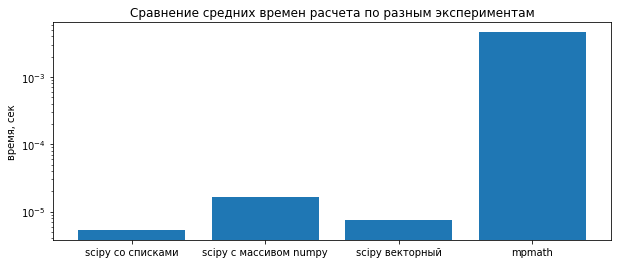

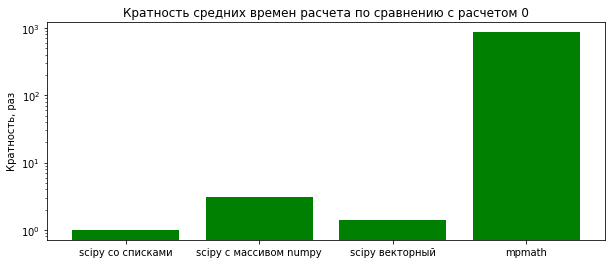

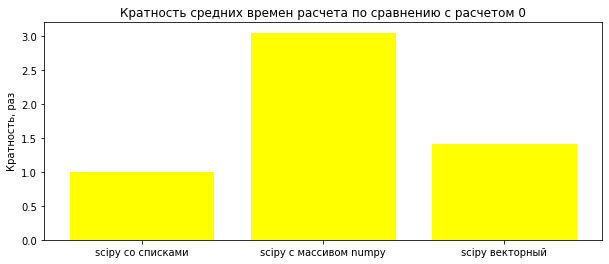

In [7]:
t_list = []
index_list =[]

# Запуск расчета 


print('Расчет с использованием scipy со списками')
t_scipy_0 = %timeit -o [pd_lapl_scipy(si) for si in [1,2,3]]
index_list.append('scipy со списками')
t_list.append(t_scipy_0.average)

print('Расчет с использованием scipy с массивом numpy')
t_scipy_1 = %timeit -o [pd_lapl_scipy(si) for si in np.array([1,2,3])]
index_list.append('scipy с массивом numpy')
t_list.append(t_scipy_1.average)

print('Расчет с использованием scipy векторный')
t_scipy_2 = %timeit -o pd_lapl_scipy(np.array([1,2,3]))
index_list.append('scipy векторный')
t_list.append(t_scipy_2.average)

print('Расчет с использованием mpmath')
t_mpmath = %timeit -o [pd_lapl_mpmath(si) for si in [1,2,3]]
index_list.append('mpmath')
t_list.append(t_mpmath.average)

plt.rcParams["figure.figsize"] = (10,4)

plt.bar(index_list, t_list)
plt.title("Сравнение средних времен расчета по разным экспериментам")
plt.ylabel('время, сек')
plt.yscale('log')
plt.show()

t_list = np.array(t_list)
plt.bar(index_list, t_list/t_list[0], color='green')
plt.title("Кратность средних времен расчета по сравнению с расчетом 0")
plt.ylabel('Кратность, раз')
plt.yscale('log')
plt.show()

# интересно посмотреть сравнение только для scipy вызовов, где все относительно быстро
t_list = np.array(t_list)
plt.bar(index_list[:-1], (t_list/t_list[0])[:-1], color='yellow')
plt.title("Кратность средних времен расчета по сравнению с расчетом 0")
plt.ylabel('Кратность, раз')
plt.show()

## Расчет численного обратного преобразования Лапласа

409 ms ± 719 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
151 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


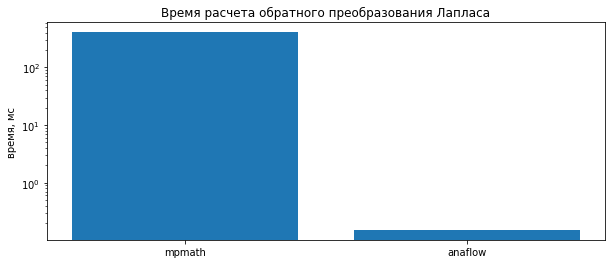

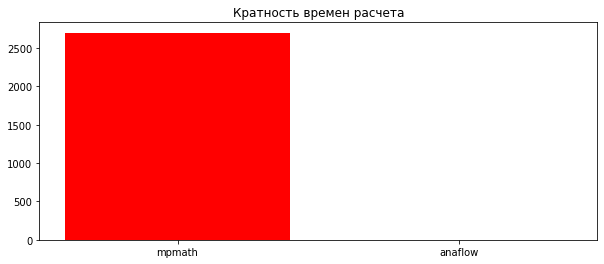

In [8]:
t_list = []
index_list =[]

# Запуск расчета 

lap_inv_anaflow = get_lap_inv(pd_lapl_scipy)
lap_inv_mpmath = lambda s: invertlaplace(pd_lapl_mpmath, s ,method='stehfest')

t_mpmath = %timeit -o [lap_inv_mpmath(ti) for ti in [1,2,3]]
t_anaflow = %timeit -o [lap_inv_anaflow(ti) for ti in [1,2,3]]

plt.bar(['mpmath', 'anaflow'], [t_mpmath.average*1000, t_anaflow.average*1000])
plt.yscale('log')
plt.ylabel('время, мс')
plt.title('Время расчета обратного преобразования Лапласа')
plt.show()


plt.bar(['mpmath', 'anaflow'], [t_mpmath.average/t_anaflow.average , 1], color = 'red')
plt.title('Кратность времен расчета')
plt.show()

Расчет с использованием `mpmath` занимает на три порядка больше времени, чем расчет с использованием алгоритма Стефеста реализованного в библиотеке `anaflow`.

# Проверка расчета численного обратного преобразования Лапласа для некоторых случаев <a class="anchor" id="laplace-invertion-check"></a>

Алгоритмы численного обратного преобразования Лапласа не идеальны и для некоторых классов функций работают плохо. Проведем расчеты для некоторых функций тут

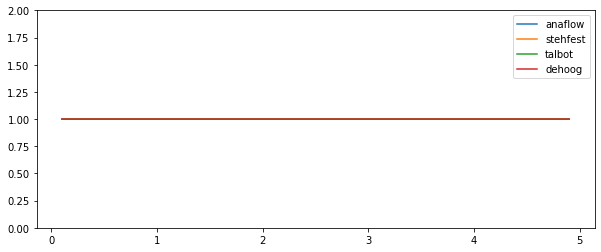

In [9]:
def pdl0(s):
    return 1/s

pd0_0 = get_lap_inv(pdl0)
pd0_1 = lambda s: invertlaplace(pdl0, s, method='stehfest', degree=5)
pd0_2 = lambda s: invertlaplace(pdl0, s, method='talbot', degree=5)
pd0_3 = lambda s: invertlaplace(pdl0, s, method='dehoog', degree=5)

x=np.arange(0.1, 5, 0.1)
plt.plot(x, pd0_0(x), label ='anaflow')
plt.plot(x, list(map(pd0_1,x)), label ='stehfest')
plt.plot(x, list(map(pd0_2,x)), label ='talbot')
plt.plot(x, list(map(pd0_3,x)), label ='dehoog')

plt.ylim(0,2)
plt.legend()
plt.show()

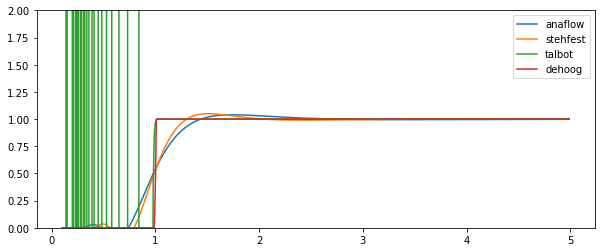

In [10]:
def pdl1_sc(s):
    return np.exp(-s)*1/s

def pdl1_mpmath(s):
    return exp(-s)*1/s

pd0_0 = get_lap_inv(pdl1_sc)
pd0_1 = lambda s: invertlaplace(pdl1_mpmath, s, method='stehfest', degree=15)
pd0_2 = lambda s: invertlaplace(pdl1_mpmath, s, method='talbot', degree=15)
pd0_3 = lambda s: invertlaplace(pdl1_mpmath, s, method='dehoog', degree=15)

x=np.arange(0.1, 5, 0.01)
plt.plot(x, pd0_0(x), label ='anaflow')
plt.plot(x, list(map(pd0_1,x)), label ='stehfest')
plt.plot(x, list(map(pd0_2,x)), label ='talbot')
plt.plot(x, list(map(pd0_3,x)), label ='dehoog')

plt.ylim(0,2)
plt.legend()
plt.show()

# Список литературы

1. Про алгоритм Стефеста